# 第13章 包和引入(Scala console不支持包，下文以纯文本方式记录）
在处理程序，尤其是大型程序时，减少耦合（coupling）是很重要的。所谓的耦合，指的是程序不同部分依赖其他部分的程度。低耦合能减少程序某个局部的某个看似无害的改动对其他部分造成严重后果的风险。减少耦合的一种方式是以模块化的风格编写代码。可以将程序切分成若干较小的模块，每个模块都有所谓的内部和外部之分。当在模块内部（即实现部分）工作时，你只需要跟同样在这个模块工作的程序员协同。只有当你必须修改模块的外部（即接口部分）时，才有必要跟在其他模块工作的开发者协同。

本章将向你展示若干能够帮助你以模块化风格编程的代码结构。包括如何将代码放进包，如何通过引入让名称变得可见，以及如何通过访问修饰符控制定义的可见性等。这些代码结构在精神上跟Java相似，不过有区别（通常更一致），因此即便你已经知道Java，本章也值得一读。

## 13.1 将代码放进包里
Scala代码存在于Java平台全局的包层次结构当中。到目前为止你看到的本书中的示例代码都位于未名（unnamed）包。在Scala中，可以通过两种方式将代码放进带名字的包里。第一种方式是在文件顶部放置一个package子句，让整个文件的内容放进指定的包，如示例13.1所示。
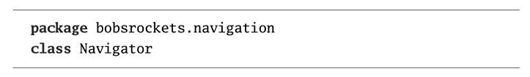

示例13.1中的package子句将Navigator类放入了名为bobsrockets. navigation的包。根据名字推测，这是一个由Bob's Rockets, Inc.开发的导航软件。

**注意**  
由于Scala代码是Java生态的一部分，对于你打算发布出来的Scala包，建议你遵循Java将域名倒过来作为包名的习惯。因此，对Navigator而言，更好的包名也许是com.bobsrockets. navigation。不过在本章，我们将省去“com.”，让代码更好理解。

另一种将Scala代码放进包的方式更像是C#的命名空间。可以在package子句之后加上一段用花括号包起来的代码块，这个代码块包含了进入该包的定义。这个语法称为打包（packaging）。示例13.2中的打包跟示例13.1的代码效果一样：
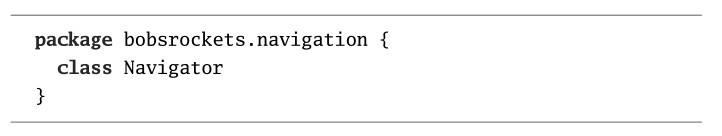

对这样一个简单的例子而言，完全可以用示例13.1那样的写法。不过，这个更通用的表示法可以让我们在一个文件里包含多个包的内容。举例来说，可以把某个类的测试代码跟原始代码放在同一个文件里，不过分成不同的包，如示例13.3所示。
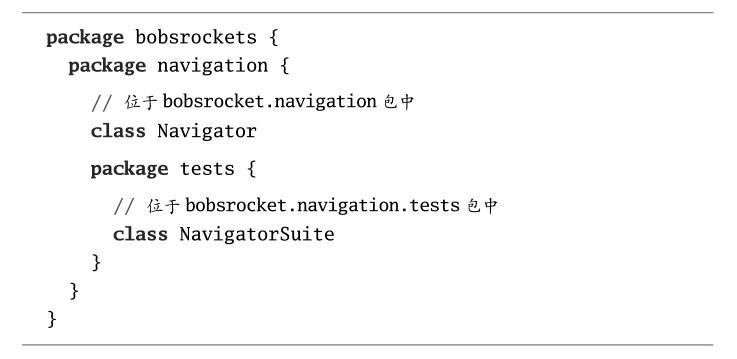
<center>示例13.3 在同一个文件中声明多个包</center>


## 13.2 对相关代码的精简访问
我们把代码按照包层次结构划分以后，不仅有助于人们浏览代码，同时也是在告诉编译器，同一个包中的代码之间存在某种相关性。在访问同一个包的代码时，Scala允许我们使用简短的，不带限定前缀的名称。

示例13.4给出了三个简单的例子。首先，就像你预期的那样，一个类不需要前缀就可以在自己的包内被别人访问。这就是为什么new StarMap能够通过编译。
StarMap类跟访问它的new表达式同属于bobsrockets.navigation包，因此并不需要加上包名前缀。

其次，包自身也可以从包含它的包里不带前缀地访问到。在示例13.4中，注意Navigator类是如何实例化的。new表达式出现在bobsrockets包中，这个包包含了bobsrockets.navigation包。因此，它可以简单地用navigation访问bobsrockets.navigation包的内容。
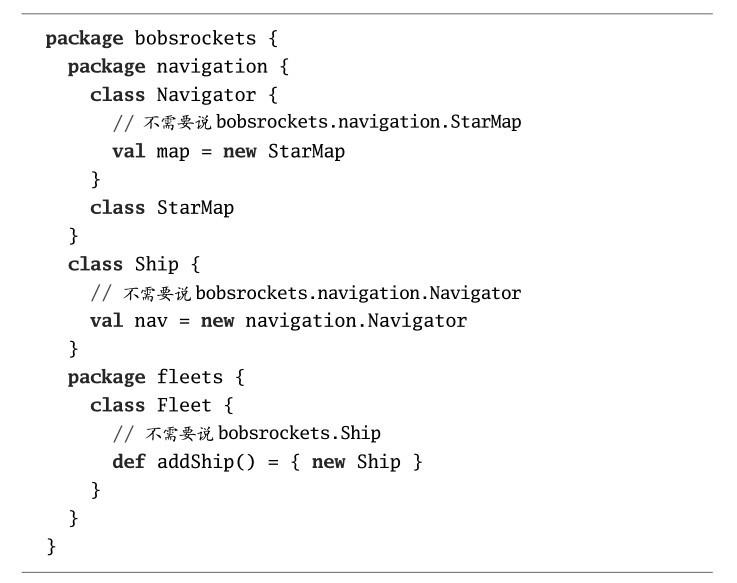
<center>示例13.4 对类和包的精简访问</center>


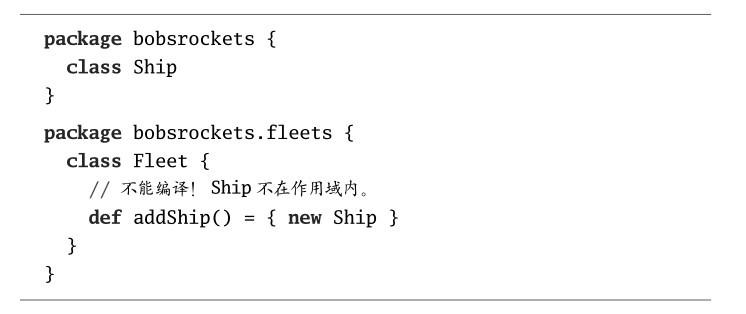
<center>示例13.5 外层包的符号并不会在当前包自动生效</center>

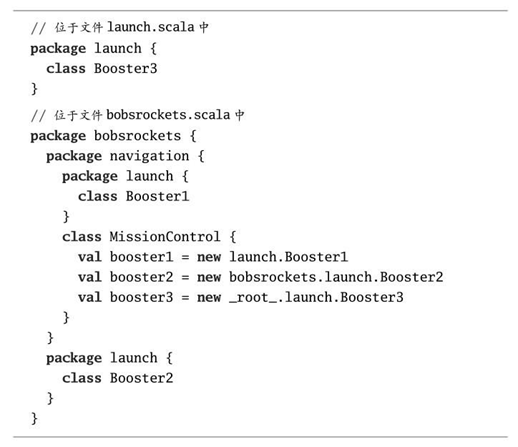
<center>示例13.6 访问隐藏的包名</center>

再次，使用花括号打包语法时，所有在包外的作用域内可被访问的名称，在包内也可以访问到。示例13.4给出的例子是用addShip（）创建新Ship。该方法由两层打包：外层的bobsrockets和内层的bobsrockets.fleets。由于Ship在外层可以被访问，因此在addShip（）中也可以被引用到。

注意这类访问只有当你显式地嵌套打包时才有效。如果你坚持每个文件只有一个包的做法，那么（就跟Java一样）只有那些在当前包内定义的名称才（直接）可用。在示例13.5中，bobsrockets.fleets这个打包被移到了顶层。由于它不再位于bobsrockets打包内部，来自bobsrockets包的内容不再直接可见。因此，new Ship将给出编译错误。如果用花括号嵌套包让你的代码过于往右侧缩进，也可以用多个package子句但不使用花括号。[1]例如，如下代码同样将Fleet类定义在两个嵌套的包（bobsrockets和fleets）里，就跟你在示例13.4中看到的一样：
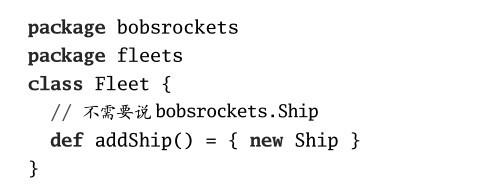
最后一个小技巧也很重要。有时，你会遇到需要在非常拥挤的作用域内编写代码的局面，包名相互遮挡。在示例13.6中，MissionControl类的作用域内包含了三个独立的名为launch的包！bobsrockets.navigation里有一个launch,bobsrockets里有一个launch，在顶层还有一个launch。你要如何来分别引用Booster1、Booster2和Booster3呢？

访问第一个很容易。直接引用launch会指向bobsrocket.navigation. launch包，因为这是最近的作用域内定义的launch包。因此，可以简单地用launch.Booster1来引用第一个推进器（booster）类。访问第二个也不难。可以用bobsrockets.launch.Booster2，这样就能清晰地表达你要的是哪一个包。那么问题就剩下第三个推进器类：考虑到嵌套的launch包遮挡了位于顶层的那一个，你如何访问Booster3呢？

***为了解决这个问题，Scala提供了一个名为__root__的包，这个包不会跟任何用户编写的包冲突***。换句话说，每个你能编写的顶层包都被当作是__root__包的成员。例如，示例13.6中的launch和bobsrockets都是__root__包的成员。因此，__root__.launch表示顶层的那个launch包，而__root__.launch.Booster3指定的就是那个最外围的推进器类。

## 13.3 引入
在Scala中，我们可以用i m p o r t子句引入包和它们的成员。被引入的项目可以用File这样的简单名称访问，而不需要限定名称，比如java. io.File。参考示例13.7的代码。
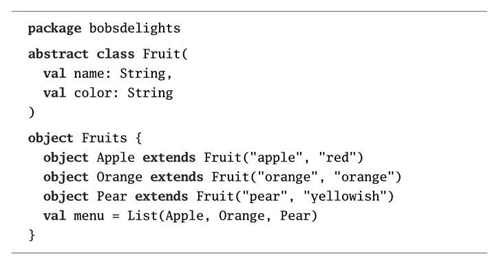
<center>示例13.7 Bob的怡人水果，已准备好被引入</center>

import子句使得某个包或对象的成员可以只用它们的名字访问，而不需要在前面加上包名或对象名。下面是一些简单的例子：
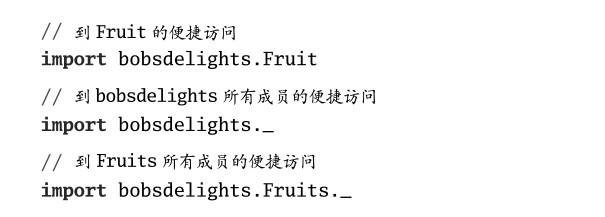
第一个对应Java的单类型引入，而第二个对应Java的按需（on-demand）引入。唯一的区别是Scala的按需引入跟在后面的是下画线（\_）而不是星号（\*） （毕竟*是个合法的标识符！）。上述第三个引入子句对应Java对类静态字段的引入。

这三个引入能让你对引入能做什么有个感性认识，不过Scala的引入实际上更加通用。首先，Scala的引入可以出现在任何地方，不仅仅是在某个编译单元的最开始，它们还可以引用任意的值。比如，示例13.8给出的import是可以做到的：
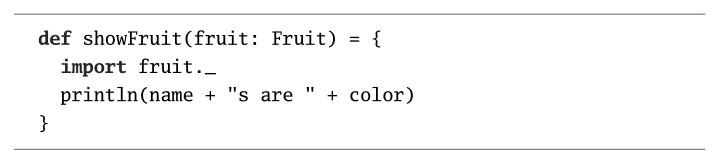
<center>示例13.8 引入一个普通（非单例）对象的成员</center>


showFruit方法引入了其参数fruit（类型为Fruit）的所有成员。这样接下来的println语句就可以直接引用name和color。这两个引用等同于fruit.name和fruit.color。这种语法在你需要用对象来表示模块时尤其有用，我们将在第29章详细介绍。

**Scala的灵活引入**  
跟Java相比，Scala的import子句要灵活得多。主要的区别有三点，在Scala中，引入可以：  
● 出现在任意位置  
● 引用对象（不论是单例还是常规对象），而不只是包  
● 让你重命名并隐藏某些被引入的成员

还有一点可以说明Scala的引入更灵活：它们可以引入包本身，而不仅仅是这些包中的非包成员。如果你把嵌套的包想象成包含在上层包内，这样的处理很自然。例如，在示例13.9中，被引入的包是java.util.regex，这使得我们可以在代码中使用regex这个简单名字。要访问java.util.regex包里的Pattern单例对象，可以直接用regex.Pattern，如示例13.9所示：
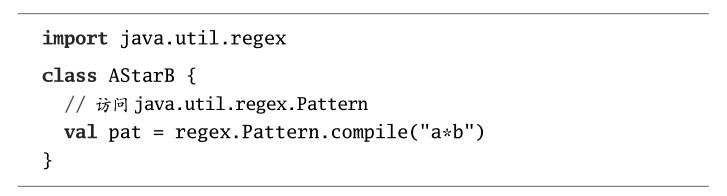
<center>示例13.9 引入一个包名</center>

Scala中的引入还可以重命名或隐藏指定的成员。做法是包在花括号内的引入选择器子句（import selector clause）中，这个子句跟在那个我们要引入成员的对象后面。以下是一些例子：
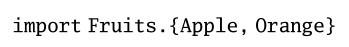
这只会从Fruits对象引入Apple和Orange两个成员。
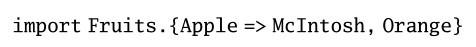
这会从Fruits对象引入Apple和Orange两个成员。不过Apple对象被重命名为McIntosh，因此代码中要么用Fruits.Apple要么用McIntosh来访问这个对象。重命名子句的形式永远都是“<原名> => <新名>”。
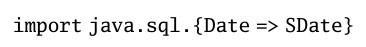
这会以SDate为名引入SQL日期类，这样就可以同时以Date这个名字引入Java的普通日期对象。
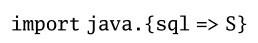
这会以S为名引入java.sql包，这样就可以编写类似S.Date这样的代码。
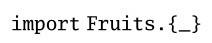
这将从Fruits对象引入所有的成员，跟import Fruits.\_的含义是一样的。
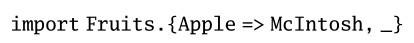
这将从Fruits对象引入所有的成员，但会把Apple重命名为McIntosh。
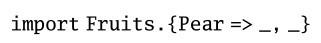
这会引入除Pear之外Fruits的所有成员。形如“<原名> => \_”的子句将在引入的名称中排除<原名>。从某种意义上讲，将某个名称重命名为“\_”意味着将它完全隐藏掉。这有助于避免歧义。比方说你有两个包，Fruits和Notebooks，都定义了Apple类。如果你只想获取名为Apple的笔记本，而不是同名的水果，你仍然可以按需使用两个引入，就像这样：
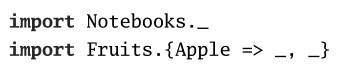
这会引入所有的Notebooks成员和所有的Fruits成员（除了Apple）。

这些例子展示了Scala在选择性地引入成员，以及用别名来引入成员方面提供的巨大灵活度。总之，引入选择器可以包含：  
**● 一个简单的名称x。这将把x包含在引入的名称集里。  
● 一个重命名子句x => y。这会让名为x的成员以y的名称可见。  
● 一个隐藏子句x => \_。这会从引入的名称集里排除掉x。  
● 一个捕获所有（catch-all）的“\_”。这会引入除了之前子句中提到的成员之外的所有成员。如果要给出捕获所有子句，它必须出现在引入选择器列表的末尾。**

在本节最开始给出的简单引入子句可以被视为带有选择器子句的引入子句的特殊简写。例如，“import p.\_”等价于“import p.{\_}”，而“import p.n”等价于“import p.{\_}”。

## 13.4 隐式引入
Scala对每个程序都隐式地添加了一些引入。本质上，这就好比每个扩展名为“.scala”的源码文件的顶部都添加了如下三行引入子句：
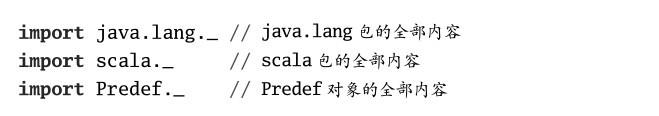
java.lang包包含了标准的Java类，它总是被隐式地引入到Scala源码文件中。[2]由于java.lang是隐式引入的，举例来说，可以直接写Thread，而不是java.lang.Thread。

你无疑已经意识到，scala包包含了Scala的标准类库，这里面有许多公用的类和对象。由于scala是隐式引入的，举例来说，可以直接写List，而不是scala.List。

Predef对象包含了许多类型、方法和隐式转换的定义，这些定义在Scala程序中经常被用到。举例来说，由于Predef是隐式引入的，可以直接写assert，而不是Predef.assert。

Scala对这三个引入子句做了一些特殊处理，后引入的会遮挡前面的。举例来说，scala包和Java 1.5版本后的java.lang包都定义了StringBuilder类。由于scala的引入遮挡了java.lang的引入，因此StringBuilder这个简单名称会引用到scala.StringBuilder，而不是java.lang.StringBuilder。


## 13.5 访问修饰符
包、类或对象的成员可以标上private和protected这样的访问修饰符。这些修饰符将对成员的访问限定在特定的代码区域。Scala对访问修饰符的处理大体上跟Java保持一致，不过也有些重要的区别，我们在本节会讲到。

**私有成员**  
Scala对私有成员的处理跟Java类似。标为private的成员只在包含该定义的类或对象内部可见。在Scala中，这个规则同样适用于内部类。Scala在一致性方面做得比Java更好，但做法不一样。参考示例13.10。
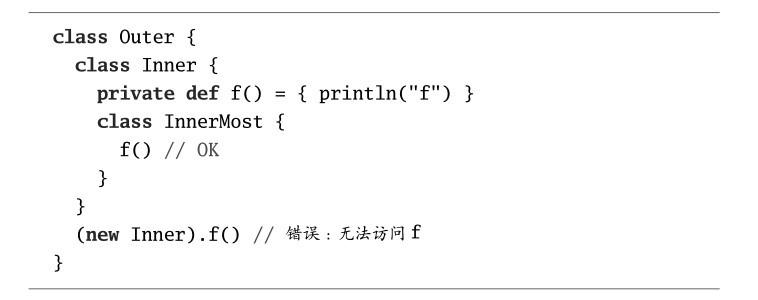
<center>示例13.10 Scala和Java在访问私有成员时的区别</center>

在Scala中，像（new Inner）.f（）这样的访问方式是非法的，因为f在Inner中声明为private并且对f的调用并不是发生在Inner类内部。而第一次在InnerMost类中访问f是OK的，因为这个调用包含在Inner类内部。Java则对两种访问都允许，因为在Java中可以从外部类访问其内部类的私有成员。

**受保护成员**  
跟Java相比，Scala对p r o t e c t e d成员的访问也更严格。在Scala中， protected的成员只能从定义该成员的子类访问。而Java允许同一个包内的其他类访问这个类的受保护成员。Scala提供了另一种方式来达到这个效果[3]，因此protected不需要为此放宽限制。示例13.11展示了对受保护成员的访问。

在示例13.11中，Sub类对f的访问是OK的，因为在Super中f声明为protected，而Sub是Super的子类。相反，Other类对f的访问是被禁止的，因为Other并不继承自Super。在Java中，后者依然被允许，因为Other跟Sub在同一个包中。
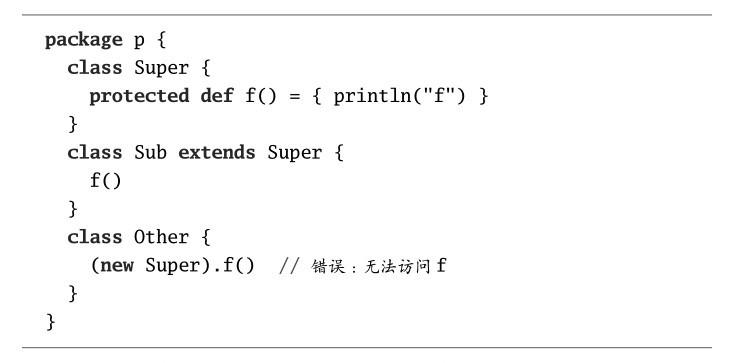
<center>示例13.11 Scala和Java在访问受保护成员时的区别</center>



**公共成员**  
Scala并没有专门的修饰符用来标记公共成员：任何没有被标为private或protected的成员都是公共的。公共成员可以从任何位置访问到。
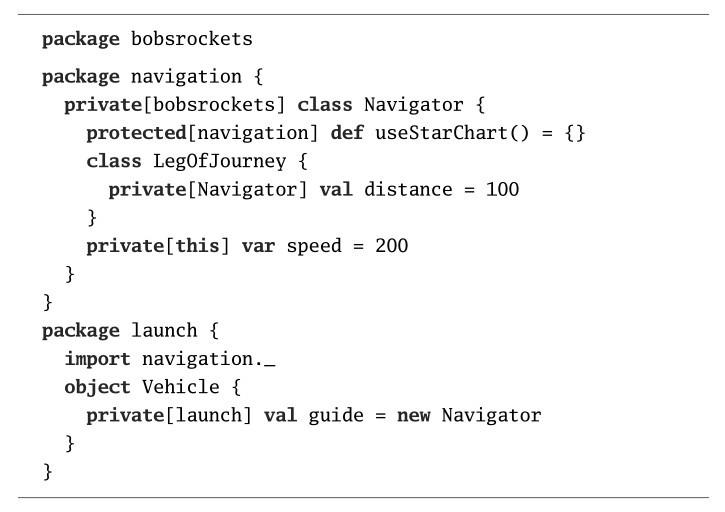
<center>示例13.12 用访问限定符实现灵活的保护域</center>

**保护的范围**  
我们可以用限定词对Scala中的访问修饰符机制进行增强。形如private[X]或protected[X]的修饰符的含义是对此成员的访问限制“上至”X都是私有或受保护的，其中X表示某个包含该定义的包、类或单例对象。

带有限定词的访问修饰符让我们可以对成员的可见性做非常细粒度的控制，尤其是它允许我们表达Java中访问限制的语义，比如包内私有、包内受保护或到最外层嵌套类范围内私有等。这些用Scala中简单的修饰符是无法直接表达出来的。这种机制还允许我们表达那些无法在Java中表达的访问规则。

示例13.12给出了使用多种访问限定词的用法。示例中，Navigator类被标为private[bobsrocket]，其含义是这个类对bobsrockets包内的所有类和对象都可见。具体来说，Vehicle对象中对Navigator的访问是允许的，因为Vehicle位于launch包，而launch是bobsrockets的子包。另一方面，所有bobsrocket包之外的代码都不能访问Navigator。

这个机制在那些跨多个包的大工程中非常有用。可以定义对工程中某些子包可见但对外部不可见的实体。这在Java中是无法做到的。一旦某个定义越过了包的边界，它就对整个世界可见了。

当然，private的限定词也可以是直接包含该定义的包。比如示例13.12中Vehicle对象的guide成员变量的访问修饰符。这样的访问修饰符跟Java的包内私有访问是等效的。

<center>表13.1 LegOfJourney.distance上private修饰符的作用</center>

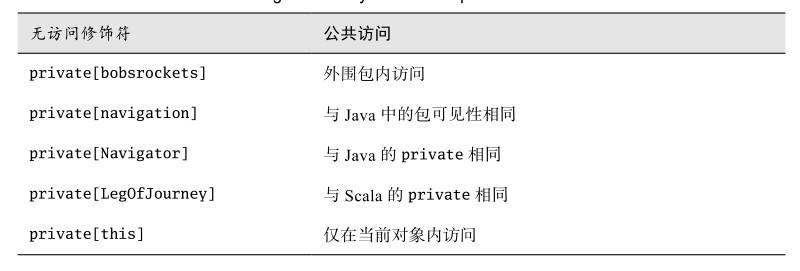

所有的限定词也可以应用在protected上，跟private上的限定词作用一样。也就是说，如果我们在C类中使用protected[X]这个修饰符，那么C的所有子类，以及X表示的包、类或对象中，都能访问这个被标记的定义。例如，示例13.12中的useStarChart方法在Navigator的所有子类，以及navigation包中的代码都可以访问。这样一来，这里的含义就跟Java的protected是完全一样的。

private的限定词也可以引用包含它的类或对象。例如，示例13.12中LegOfJourney类的distance变量被标记为private[Navigator]，因此它在整个Navigator类中都可以访问。这就达到了跟Java中内部类的私有成员一样的访问能力。当C是最外层的嵌套时，private[C]跟Java的private就是一样的效果。

最后，Scala还提供了比private限制范围更小的访问修饰符。被标记为private[this]的定义，只能在包含该定义的同一个对象中访问。这样的定义被称作是对象私有（object-private）的。例如，示例13.12中Navigator类的speed定义就是对象私有的。这意味着所有对它的访问不仅必须来自Navigator类内部，并且还必须是来自Navigator的同一个实例。因此在Navigator中“speed”和“this.speed”是合法的访问。

而如下的访问则是不被允许的，虽然它来自Navigator类内部：
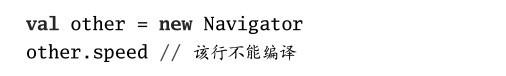
将一个成员标记为private[this]，保证了它不会被同一个类的其他对象看到。这对于文档来说是有意义的。同时也方便我们编写更通用的型变（variance）注解（参考19.7节）。

总结一下，表13.1（253页）列出了private限定词的作用。每一行都给出了一个带限定词的私有修饰符，以及如果将这样的修饰符加到示例13.12中LegOfJourney类的distance变量上是什么含义。

**可见性和伴生对象**  
在Java中，静态成员和实例成员同属一个类，因此访问修饰符对它们的应用方式是统一的。你已经知道Scala没有静态成员；而是用伴生对象来承载那些只存在一次的成员。例如，示例13.13中Rocket对象就是Rocket类的伴生对象。

Scala的访问规则在private和protected的处理上给伴生对象和类保留了特权。一个类会将它的所有访问权跟它的伴生对象共享，反过来也一样。具体来说，一个对象可以访问它的伴生类的所有私有成员，一个类也可以访问它的伴生对象中的所有私有成员。

举例来说，示例13.13中的Rocket类可以访问fuel方法，而该方法在Rocket对象中被声明为private。同理，对象Rocket也能访问Rocket类中的私有方法canGoHomeAgain。

Scala和Java在修饰符的方面的确很相似，不过有一个重要的例外：protected static。Java中类C的protected static成员可以被C的所有子类访问。而对于Scala的伴生对象而言，protected的成员没有意义，因为单例对象没有子类。
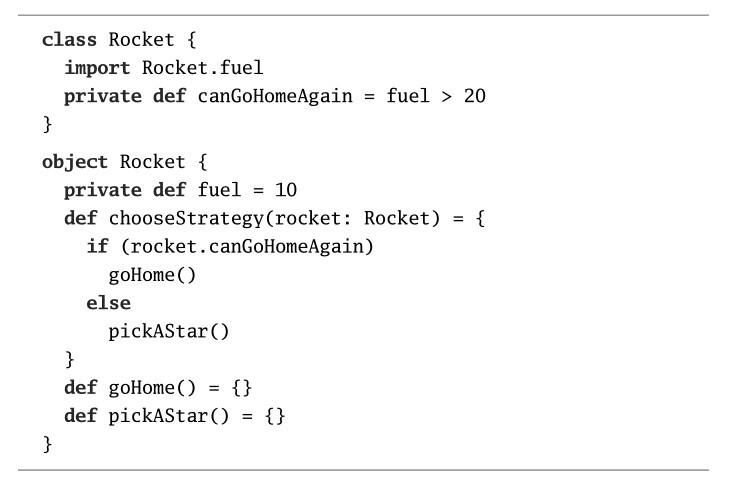
<center>示例13.13 类和伴生对象之间的私有成员互访</center>

## 13.6 包对象
到目前为止，你见过能添加到包里的代码有类、特质和孤立对象。这些是放在包内顶层最常见的定义。不过Scala允许你放在包级别的并非只有上述这些——任何你能放在类级别的定义，都能放在包级别。如果你有某个希望在整个包都能用的助手方法，大可将它放在包的顶层。

具体的做法是把定义放在包对象（package object）当中。每个包都允许有一个包对象，任何被放在包对象里的定义都会被当作这个包本身的成员。
参考示例13.14。package.scala这个文件包含了一个bobsdelights包的包对象。从语法上讲，包对象跟本章前面展示的花括号“打包”很像。唯一的区别是包对象包含了一个object关键字。这是一个包对象，而不是一个包。花括号括起来的部分可以包含任何你想添加的定义。本例中的包对象包含了从示例13.8借鉴过来的工具方法showFruit。
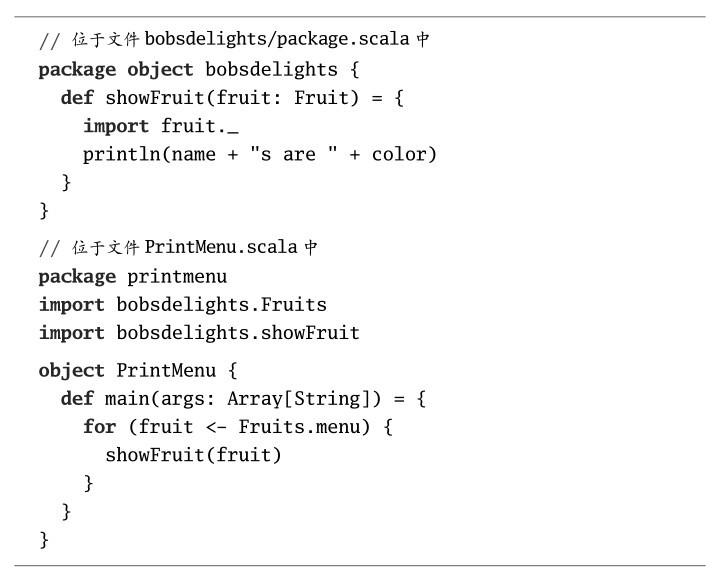
<center>示例13.14 一个包对象</center>

有了这样的定义，任何包的任何其他代码都可以像引入类一样引入这个方法。例如，示例13.14也给出了孤立对象PrintMenu，它位于一个不同的包。PrintMenu可以像引入Fruit类那样引入showFruit方法。

继续往前看，包对象还有不少等着你去发现的用途。包对象经常用于包级别的类型别名（第20章）和隐式转换（第21章）。顶层的scala包也有一个包对象，其中的定义对所有Scala代码都可用。

包对象会被编译成名为package.class的类文件，该文件位于它增强的包的对应目录下。源文件最好能保持相同的习惯，也就是说我们一般会将示例13.14的包对象bobsdelights的源码放在bobsdelights目录下名为package.scala的文件当中。

## 13.7 结语
在本章，你看到了将程序切分为包的基本语法结构。这给了你简单而实用的模块化，让你能够将大量的代码分隔成不同的组成部分，从而不相互冲突和干扰。Scala的包系统跟Java十分神似，但也有一些区别，Scala在这些点上比Java做得更一致、更通用。

在稍后的第29章，我们将介绍一种比切分包更灵活的模块系统。除了能把代码分离成若干命名空间外，这样的模块系统还允许我们对模块做参数化，以及让它们继承彼此。在下一章，我们先把注意力转向断言和单元测试。

________________________________________
[1].这种不带花括号的多个package子句连在一起的样式称作链式包子句（chained package clauses）。  
[2].Scala原本还有个.NET平台的实现，默认引入的命名空间为System，对应Java的java.lang。  
[3].可以用限定词（qualifier），参考“保护的范围”。